###Import Library from GitHub

In [1]:
#If needed, clear the old directory:
#!rm -r 'iplfractals'
#!git clone https://github.com/nghess/iplfractals.git

In [2]:
import iplfractals as fractal

# Generate a 3d fractal

To generate a 3d fractal, we again use the Generate() function, changing the dimension argument from 2 to 3

In [3]:
dynamic = fractal.Generate(beta=3, seed=1515, size=256, dimension=3)

### Preview 3d fractals as 2d frames
For 3d fractals, the preview2d() function grabs the top frame in the stack by default. 
It also takes an argument to specify other frames on a 1-99 scale. An argument of 50 will find the middle frame in the stack.

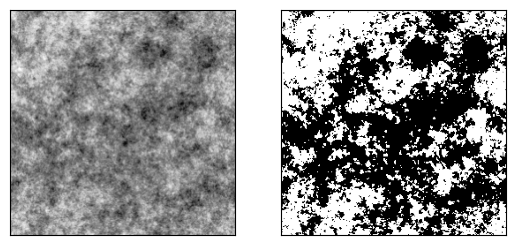

In [4]:
#First frame in the stack
dynamic.preview2d()

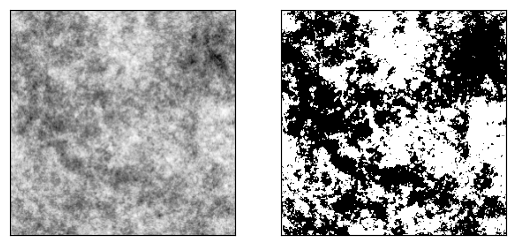

In [5]:
#50% of the way through the stack
dynamic.preview2d(50)

### Preview 3d fractals as volumes
We can also preview 3d fractals as cubic volumes. This method is computationally intensive at high resolutions, so as a time saver, I automatically resize the fractal to 64 voxels per side before rendering.

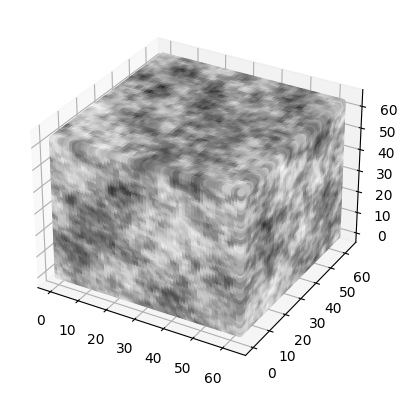

In [6]:
dynamic.preview3d()

### Analyze Single Pixel Change

In [17]:
import numpy as np
import matplotlib.pyplot as plt

vec = dynamic.pattern[0,0,:]
time = np.linspace(0,len(vec))

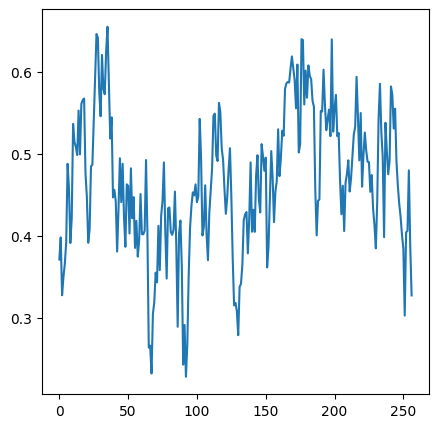

In [18]:
plt.plot(vec)

In [42]:
def pixel_variance(dynamic_fractal):

    px_variance = []

    for x in range(len(vec)):
        for y in range(len(vec)):
            px_change = dynamic_fractal.pattern[x,y,:]
            px_variance.append(np.var(px_change))
    
    return px_variance

### Generate a few fractals to compare with each other:

In [40]:
d30 = fractal.Generate(beta=3, seed=1515, size=256, dimension=3)
d35 = fractal.Generate(beta=3.5, seed=1515, size=256, dimension=3)
d40 = fractal.Generate(beta=4.0, seed=1515, size=256, dimension=3)

In [47]:
vec = d30.pattern[0,0,:]
time = np.linspace(0,len(vec))

In [49]:
d30_var = pixel_variance(d30)
d35_var = pixel_variance(d35)
d40_var = pixel_variance(d40)

In [45]:
counts30, bins30 = np.histogram(d30_var)
counts35, bins35 = np.histogram(d35_var)
counts40, bins40 = np.histogram(d40_var)

#plt.stairs(counts30, bins30)
#plt.stairs(counts35, bins35)
#plt.stairs(counts40, bins40)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''